# Demonstration of Open Authentication (OATH)

OATH tokens have two implementations: Time based [TOTP](https://en.wikipedia.org/wiki/Time-based_One-Time_Password) and HMAC based [HOTP](https://en.wikipedia.org/wiki/HMAC-based_One-Time_Password)

Google Authenticator is a popular example of web sites using OATH as an alternative to passwords.  


## Lesson #1 Registration of a user's secret

In [5]:
# The secret has a special format of 16 [base32](https://en.wikipedia.org/wiki/Base32) 'digits'
# generateSecret will create a properly formatted random secret

import google_authenticator as ga

print( "Secret1= %s" % ga.generateSecret())
print( "Secret2= %s" % ga.generateSecret())
print( "Secret3= %s" % ga.generateSecret())


Secret1= Y345EGDECIQTZN6C
Secret2= OGAP3UWKTQY3N7DW
Secret3= A53W4GZCQBX46PSM


In [3]:
import google_authenticator as ga

secret = ga.generateSecret()
name = 'yourname'
ga.registerUser({'name':name,'secret':secret})
print("Registered %s, secret= %s" % (name, secret))

topt = ga.currentTOTP(name)
print("Validate topt= %s" % ga.validateTOTP({'name':name,'code':topt}))
   


Registered yourname, secret= 7UVXJJJUXCS7DKCY
Validate topt= Validated


## Lesson #2 TOTP codes expire after 30 seconds

In [3]:
# This code snipet shows how token code rollover every 30 seconds
# Old codes will not validate, this reduces the concern about them being stolen

import google_authenticator as ga

topt = ga.currentTOTP(name)
print("Current code= %s" % topt)
print("Validate topt= %s" % ga.validateTOTP({'name':name,'code':topt}))

# This will show the current code, then wait for the next time interval
ga.rolloverTOTP()
   

# The first code is now invalid
print("Validate topt= %s" % ga.validateTOTP({'name':name,'code':topt}))


Current code= %s 254479
Validate topt= Validated
code=169131 seconds to rollover=21
code=124574


 ## Lesson #3 HOTP codes are only valid once

In [5]:
# This code snipet shows how HOTP code becomes invalid after one use
# Unlike TOTP codes that are based on a secret and the time
# HOTP codes are based on a secret and a counter.
# Everytime a code is validated the counter is incremented, thus invalidating 
# previous codes.  The TOTP method generally preferred because it avoids
# issues caused by the client and server counters getting out of sync.

import google_authenticator as ga

# google_authenitcator module maintains the counter as a variable
print('HOTP counter= %d' % ga.HOTP_COUNTER)

hopt = ga.currentHOTP(name)
print("Current code= %s" % hopt)
print("Validate hopt= %s" % ga.validateHOTP({'name':name,'code':hopt}))

# The first code is now invalid
print('HOTP counter= %d' % ga.HOTP_COUNTER)
print("Validate hopt= %s" % ga.validateHOTP({'name':name,'code':hopt}))


HOTP counter= 123457
Current code= 487054
Validate hopt= Validated
HOTP counter= 123458
Validate hopt= Failed


In [8]:
# Most HOTP implementations allow for a small of counters to be valid
# because the client increments when it generates a code
# and the server increments when it recieves.  Unsend codes and 
# communication failures will unsync the clinet/server counters
# This module uses a sync range of 10

import google_authenticator as ga

# Current counter and code
print('HOTP counter= %d' % ga.HOTP_COUNTER)
hopt = ga.currentHOTP(name)
print("Current code= %s" % hopt)
print("Validate hopt= %s" % ga.validateHOTP({'name':name,'code':hopt}))

# Set the server counter back 5, this will still validate
print('HOTP counter= %d' % ga.HOTP_COUNTER)
hopt = ga.currentHOTP(name)
print("Current code= %s" % hopt)
ga.HOTP_COUNTER -= 5
print("Validate hopt= %s" % ga.validateHOTP({'name':name,'code':hopt}))

# Set the server counter back 15, this will not validate
print('HOTP counter= %d' % ga.HOTP_COUNTER)
hopt = ga.currentHOTP(name)
print("Current code= %s" % hopt)
ga.HOTP_COUNTER -= 15
print("Validate hopt= %s" % ga.validateHOTP({'name':name,'code':hopt}))



HOTP counter= 123460
Current code= 128009
Validate hopt= Validated
HOTP counter= 123461
Current code= 997634
Validate hopt= Validated
HOTP counter= 123462
Current code= 258824
Validate hopt= Failed


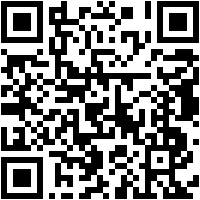

In [5]:
import google_authenticator as ga
import IPython.display as Disp

secret = ga.generateSecret()
name = 'yourname'

qr = ga.showQR(secret,name)
Disp.Image(qr.content)

In [11]:
    
    print( "currentHOTP=%s" % currentHOTP())
    print( "currentTOTP=%s" % currentTOTP())
    
    secret = generateSecret()
    name = 'alice'
    registerUser({'name':name,'secret':secret})
    topt = currentTOTP(name)
    hopt = currentHOTP(name)
    print("Registered %s, secret= %s, topt= %s, hopt=%s" % (name, secret, topt, hopt))

    print("Validate hopt= %s" % validateHOTP({'name':'alice','code':hopt}))

    # errors
    rolloverTOTP()
    print("Validate old topt= %s (should fail)" % validateHOTP({'name':'alice','code':topt}))
    hopt = get_otp_token(SECRETS.get(name,'unknown'), HOTP_COUNTER+20)
    print("Invalid hopt=1 %s (should fail)" % validateHOTP({'name':'alice','code':1}))
    print("Validate hopt=+20 %s (should fail)" % validateHOTP({'name':'alice','code':hopt}))


GA3EKRBSGI3TSOBQHFCDSNZSGE======


# Extra credit: Google Authenticator

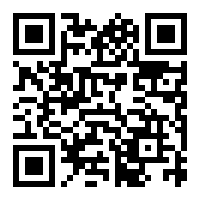

In [6]:
# Google provides an API to generate QR codes to be used with Google Authenticator

import requests
import IPython.display as Disp

# Experiment with the variable settings
secret = "yoursecret"
name = "yourname"
website = "https://yoursite"
url = "https://chart.googleapis.com/chart?chs=200x200&chld=M|0&cht=qr&chl=" + website + "?name=" + name + "&secret=" + secret;

# Show the QR code
Disp.Image(requests.get(url).content)

# Result is the website and you now share a secret associated with your name